In [14]:
import json
import numpy as np
import tensorflow as tf
import keras

from matplotlib import pyplot as plt

np.random.seed(78)

Text(0, 0.5, 'y')

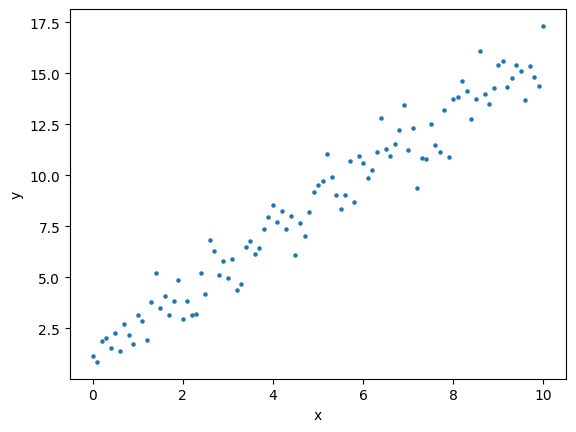

In [2]:
noise = np.random.normal(0, 1, 101)
x = np.linspace(0, 10, 101)
y = 1.5 * x + 1 + noise

plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')

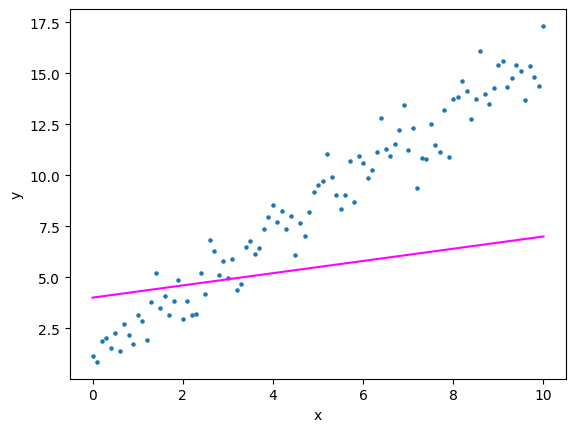

In [3]:
# starting parameters
a = tf.Variable(0.3)
b = tf.Variable(4.0)

plt.plot(x, a * x + b, color='magenta')
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [4]:
# loss function (SSE)
def compute_loss(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

y_pred = a * x + b
compute_loss(y, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2272.6689453125>

In [5]:
NEPOCH = 100
LEARNING_RATE = 0.0001

loss_history = []
for i in range(NEPOCH):
    with tf.GradientTape() as tape:
        y_pred = a * x + b

        # a = a - LEARNING_RATE * np.sum((y_pred - y) * x)
        # b = b - LEARNING_RATE * np.sum(y_pred - y)

        current_loss = compute_loss(y, y_pred)
    grada, gradb = tape.gradient(current_loss, [a, b])

    a.assign(a - LEARNING_RATE * grada)
    b.assign(b - LEARNING_RATE * gradb)

    loss_history.append(current_loss)

# set loss history to floating point variable
loss_history = [float(x) for x in loss_history]

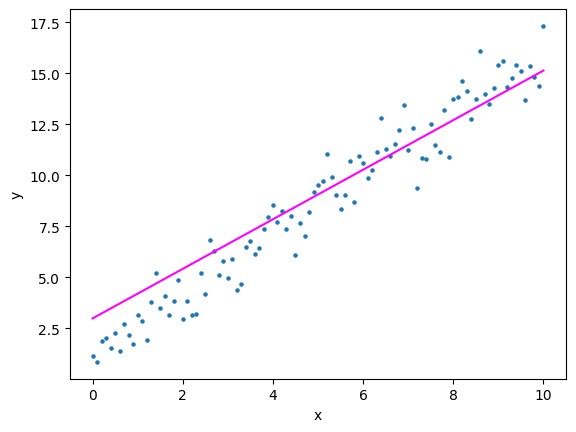

In [6]:
# final parameters
plt.plot(x, a * x + b, color='magenta')
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

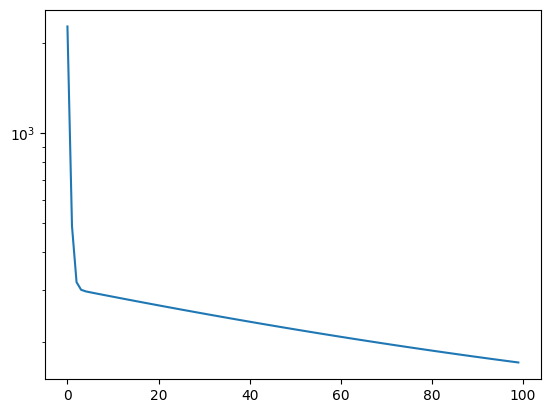

In [7]:
plt.plot(loss_history)
plt.yscale('log')
plt.show()

In [8]:
# save loss history
with open("results/linear_regression.tfbase.result.json", "w") as file_handle:
    json.dump({"a": float(a), "b": float(b), "loss_history": loss_history}, file_handle)

# Compare NP vs TFBase

In [9]:
with open("results/linear_regression.numpy.result.json", "r") as file_handle:
    numpy_loss_history = json.load(file_handle)["loss_history"]

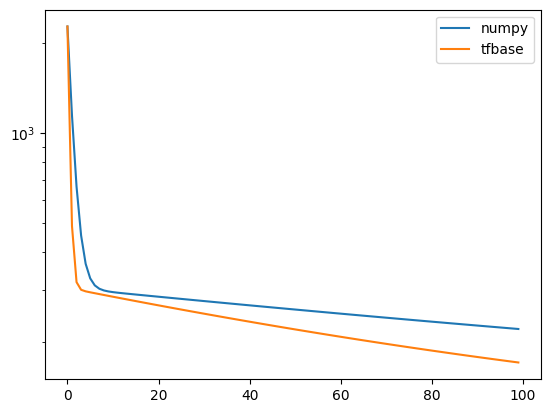

In [11]:
plt.plot(numpy_loss_history, label="numpy")
plt.plot(loss_history, label="tfbase")
plt.legend()
plt.yscale('log')
plt.show()

# Using ADAM

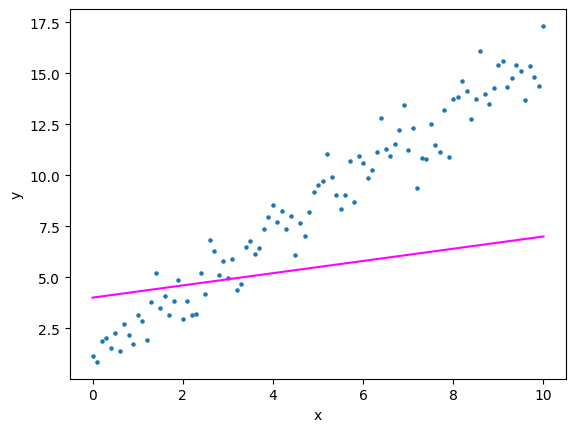

In [69]:
# starting parameters
a = tf.Variable(0.3)
b = tf.Variable(4.0)

plt.plot(x, a * x + b, color='magenta')
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [70]:
y_pred = a * x + b
compute_loss(y, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2272.6689453125>

In [71]:
NEPOCH = 100
LEARNING_RATE = 0.05

optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

loss_history = []
for i in range(NEPOCH):
    with tf.GradientTape() as tape:
        y_pred = a * x + b

        # a = a - LEARNING_RATE * np.sum((y_pred - y) * x)
        # b = b - LEARNING_RATE * np.sum(y_pred - y)

        current_loss = compute_loss(y, y_pred)
    grada, gradb = tape.gradient(current_loss, [a, b])

    # a.assign(a - LEARNING_RATE * grada)
    # b.assign(b - LEARNING_RATE * gradb)
    
    optimizer.apply_gradients(zip([grada, gradb], [a, b]))

    loss_history.append(current_loss)

# set loss history to floating point variable
loss_history = [float(x) for x in loss_history]

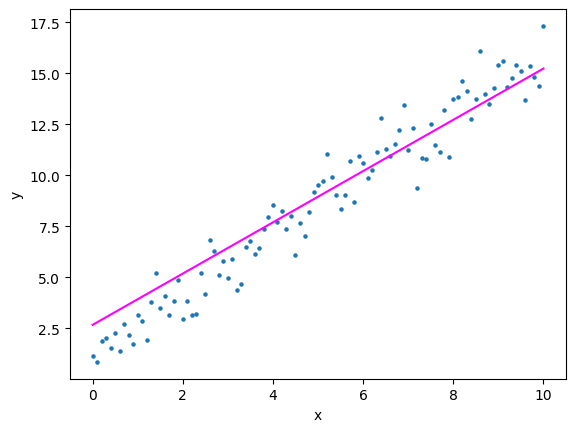

In [72]:
# final parameters
plt.plot(x, a * x + b, color='magenta')
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [73]:
# save loss history
with open("results/linear_regression.tfadam.result.json", "w") as file_handle:
    json.dump({"a": float(a), "b": float(b), "loss_history": loss_history}, file_handle)

## Compare

In [74]:
with open("results/linear_regression.numpy.result.json", "r") as file_handle:
    numpy_loss_history = json.load(file_handle)["loss_history"]

with open("results/linear_regression.tfbase.result.json", "r") as file_handle:
    base_loss_history = json.load(file_handle)["loss_history"]

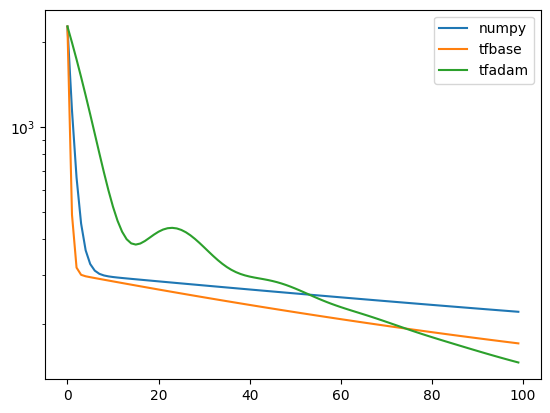

In [75]:
plt.plot(numpy_loss_history, label="numpy")
plt.plot(base_loss_history, label="tfbase")
plt.plot(loss_history, label="tfadam")
plt.legend()
plt.yscale('log')
plt.show()